## Observations and Insights 

Analysis & Observation
1
2
3


In [1]:
# Import dDependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Get the path to the data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#Check the number of mice. Want to do unique so you do not get the duplicates
number_unique_mice=len(combined_data['Mouse ID'].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Clean the data by removing the duplicates of mice
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#Check the number of mice after dropping the duplicate
len_dropped_data=len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Do a groupby to get the statistical values of the tumor volume for each drug regimen

regime_group=clean_df.groupby('Drug Regimen')

regimen_mean=regime_group["Tumor Volume (mm3)"].mean()
# print(regimen_mean)
regimen_median=regime_group["Tumor Volume (mm3)"].median()
# print(regimen_median)
regimen_variance=regime_group["Tumor Volume (mm3)"].var()
# print(regimen_variance)
regimen_std_dev=regime_group["Tumor Volume (mm3)"].std()
# print(regimen_std_dev)
regimen_sem=regime_group["Tumor Volume (mm3)"].sem()
# print(regimen_sem)

#Create the Data Frame and display it
summary_statistics_df=pd.DataFrame({
    "Mean": regimen_mean, 
    "Median":regimen_median,
    "Variance": regimen_variance, 
    "Standard Deviation":regimen_std_dev, "SEM": regimen_sem })
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Use groupby to filter by the drug regimen group to find the total amount of mice per treatment
combined_group=combined_data.groupby('Drug Regimen')
count_makers = combined_group['Mouse ID'].count()

In [16]:
# combined_group=combined_data.groupby('Drug Regimen')

In [17]:
# # Count how many times each maker appears in our group
# count_makers = combined_group['Mouse ID'].count()

# count_makers

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

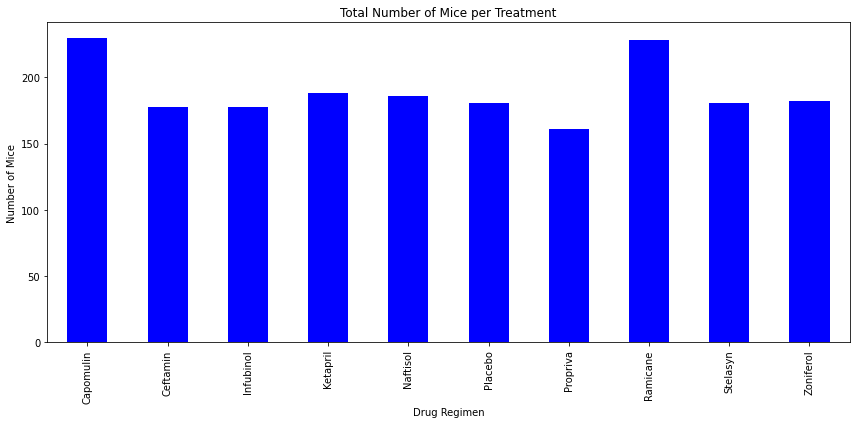

In [18]:
#Plot the bar plot for the total number of mice for each treatment throughout the course using pandas. Make sure to label it. 
bar_pandas=count_makers.plot(kind="bar", figsize=(12,6), color='b')
bar_pandas.set_ylabel("Number of Mice")
plt.title("Total Number of Mice per Treatment")
plt.tight_layout()
plt.show()

In [20]:
#Plot the bar plot for the total number of mice for each treatment throughout the course using pyplot. Make sure to label it. 
#Count the length of treatments to plot on the x axis
x_axis = np.arange(len(count_makers)
tick_locations = [value for value in x_axis]
plt.figure(figsize=(12,6))
plt.bar(x_axis, count_makers, color='b', alpha=.80, align="center")
plt.xticks(tick_locations, ['Capomulin', 
                            'Ceftamin', 'Infubinol', 'Ketapril', 
                            'Naftisol', 'Placebo', 'Propriva', 
                            'Ramicane', 'Stelasyn', 'Zoniferol'] , rotation="vertical")
plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(count_makers)+10)
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()                   

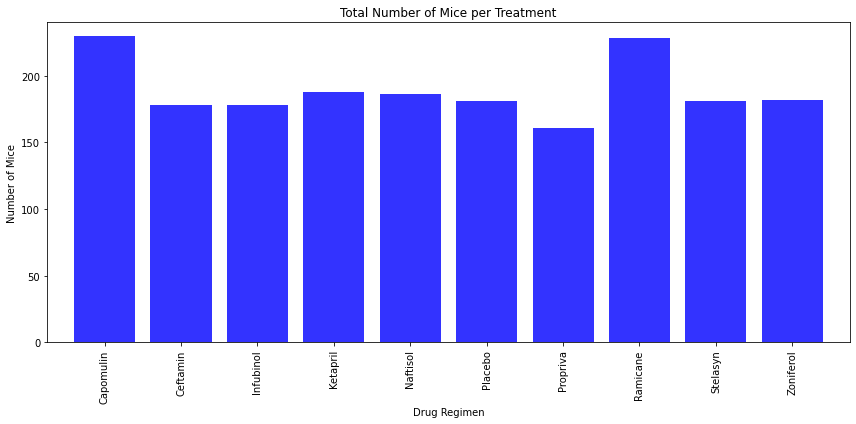

In [21]:
# plt.figure(figsize=(12,6))
# plt.bar(x_axis, count_makers, color='b', alpha=.80, align="center")
# plt.xticks(tick_locations, ['Capomulin', 
#                             'Ceftamin', 'Infubinol', 'Ketapril', 
#                             'Naftisol', 'Placebo', 'Propriva', 
#                             'Ramicane', 'Stelasyn', 'Zoniferol'] , rotation="vertical")
# plt.xlim(-.75, len(x_axis)-.25)
# plt.ylim(0, max(count_makers)+10)
# plt.title("Total Number of Mice per Treatment")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Mice")
# plt.tight_layout()
# plt.show()

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas.
# Group by gender (sex) and find unique to find the total number of male and female mice
gender_group = combined_data.groupby("Sex")
unique_gender_count = gender_group.nunique()["Mouse ID"]

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

In [23]:
# total_mice=len(combined_data['Mouse ID'].unique())

249

In [24]:
gender_percent=(unique_gender_count/total_mice)*100
# gender_percent

Sex
Female    49.799197
Male      50.200803
Name: Mouse ID, dtype: float64

In [25]:
gender_df=pd.DataFrame({"Total Count": unique_gender_count, "Percentage of Gender":gender_percent})
gender_df.sort_values(["Total Count"], ascending = False).style.format({"Percentage of Gender":"{:.2f}%"})

,Total Count,Percentage of Gender
Sex,,
Male,125,50.20%
Female,124,49.80%


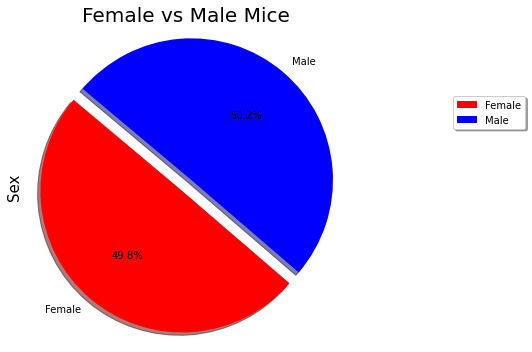

In [26]:
#Plot the pie chart using pandas
colors = ['red', 'blue']
explode = (0.1, 0)
gender_plot=gender_df.plot.pie(y= 'Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.axis("equal")
plt.title('Female vs Male Mice',fontsize = 20)
plt.ylabel('Sex',fontsize = 15)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Create the lists of the values to create the pie plot
gender=['Female', 'Male']
percent = [49.8, 50.2]
colors = ['red', 'blue']
explode = (0.1,0)

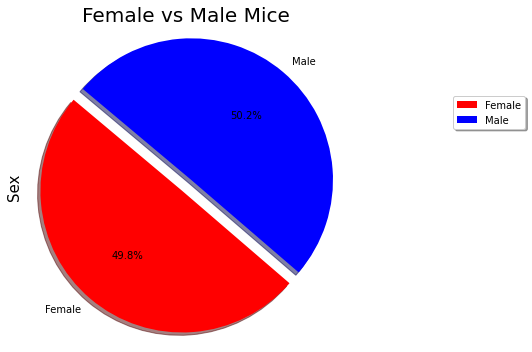

In [28]:
#Plot the pie chart
plt.pie(percent, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, )
plt.axis("equal")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Female vs Male Mice',fontsize = 20)
plt.ylabel('Sex',fontsize = 15)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

## Quartiles, Outliers and Boxplots 

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#First we will use loc to filter through the data set by the treatments
regimen_cap=combined_data.loc[combined_data['Drug Regimen']=="Capomulin",:]
regimen_ram=combined_data.loc[combined_data['Drug Regimen']=="Ramicane",:]
regimen_inf=combined_data.loc[combined_data['Drug Regimen']=="Infubinol",:]
regimen_cef=combined_data.loc[combined_data['Drug Regimen']=="Ceftamin",:]


In [85]:
# regimen_cap=combined_data.loc[combined_data['Drug Regimen']=="Capomulin",:]
# regimen_ram=combined_data.loc[combined_data['Drug Regimen']=="Ramicane",:]
# regimen_inf=combined_data.loc[combined_data['Drug Regimen']=="Infubinol",:]
# regimen_cef=combined_data.loc[combined_data['Drug Regimen']=="Ceftamin",:]

#Group by the Mouse ID to be able to obtain the max of the timepoint of each sepific treatment 
group_capo=regimen_cap.groupby('Mouse ID')
last_vol_cap=group_capo['Timepoint'].max()

#Create your Data Frame of the max value
cap_tum_vol_df=pd.DataFrame(last_vol_cap)

#Merge the new data drame by the previous data set on Mouse ID and Timepoint and to get all the date of the Mouse ID since we want the treatment for each mice
cap_merge = pd.merge(cap_tum_vol_df, combined_data, on=('Mouse ID','Timepoint'), how='left')

#Use the new data frame to get the final total tumor volume for the specific treatment
cap_tum_vol=cap_merge['Tumor Volume (mm3)']

#Calculate the lower and upper quartile, interquartile and median. Then print out.
quartiles = cap_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr}")
print(f"The median of Capomulin tumor value is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The median of Capomulin tumor value is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [86]:
#Group by the Mouse ID to be able to obtain the max of the timepoint of each sepific treatment 
group_ram=regimen_ram.groupby('Mouse ID')
last_vol_ram=group_ram['Timepoint'].max()

#Create your Data Frame of the max value
ram_tum_vol_df=pd.DataFrame(last_vol_ram)

#Merge the new data drame by the previous data set on Mouse ID and Timepoint and to get all the date of the Mouse ID since we want the treatment for each mice
ram_merge = pd.merge(ram_tum_vol_df, combined_data, on=('Mouse ID','Timepoint'), how='left')

#Use the new data frame to get the final total tumor volume for the specific treatment
ram_tum_vol=ram_merge['Tumor Volume (mm3)']
# ram_tum_vol

quartiles = ram_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr}")
print(f"The median of Ramicane tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [87]:
group_inf=regimen_inf.groupby('Mouse ID')
last_vol_inf=group_inf['Timepoint'].max()

inf_tum_vol_df=pd.DataFrame(last_vol_inf)
# inf_tum_vol_df

inf_merge = pd.merge(inf_tum_vol_df, combined_data, on=('Mouse ID','Timepoint'), how='left')
# inf_merge

inf_tum_vol=inf_merge['Tumor Volume (mm3)']
# inf_tum_vol

quartiles = inf_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr}")
print(f"The median of Infubinol tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The median of Infubinol tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [89]:
group_cef=regimen_cef.groupby('Mouse ID')
last_vol_cef=group_cef['Timepoint'].max()

cef_tum_vol_df=pd.DataFrame(last_vol_cef)
# inf_tum_vol_df

cef_merge = pd.merge(cef_tum_vol_df, combined_data, on=('Mouse ID','Timepoint'), how='left')
# inf_merge

cef_tum_vol=cef_merge['Tumor Volume (mm3)']
# inf_tum_vol

quartiles = cef_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr}")
print(f"The median of Ceftamin tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003
The interquartile range of Ceftamin tumor volume is: 15.577752179999997
The median of Ceftamin tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [90]:
boxplot_list=[cap_tum_vol,ram_tum_vol,inf_tum_vol,cef_tum_vol]

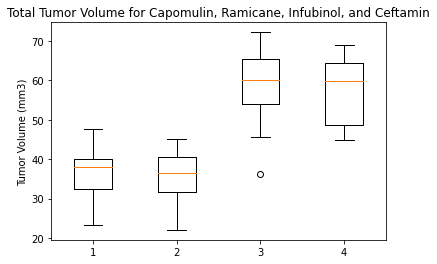

In [93]:
fig1, ax1 = plt.subplots()
ax1.boxplot(boxplot_list)
ax1.set_title('Total Tumor Volume for Capomulin, Ramicane, Infubinol, and Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"]== "Capomulin",:]
capomulin_df

In [ ]:
unique_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
unique_mouse_df

In [ ]:
# x_axis = unique_mouse_df["Timepoint"]
# x_axis
x_axis = np.arange(0, 100, 10)
# x_axis
tumor_vol = unique_mouse_df["Tumor Volume (mm3)"]
# tumor_vol
plt.plot(x_axis, tumor_vol,linewidth=2, markersize=10,marker="o",color="blue")
plt.title('Treatmeant of Mouse s185',fontsize =15)
plt.xlabel('Timepoint',fontsize =10)
plt.ylabel('Tumor Volume (mm3)',fontsize =10)
plt.grid()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_mouse_cap=capomulin_df.groupby(['Mouse ID']).mean()
# avg_mouse_cap
avg_tum_vol=avg_mouse_cap['Tumor Volume (mm3)']
# avg_tum_vol
avg_weight_vol=avg_mouse_cap['Weight (g)']
# avg_weight_vol
plt.scatter(avg_weight_vol, avg_tum_vol, marker="o", facecolors="blue", edgecolors="black")
plt.title('Average Mouse Weight vs Average Tumor Volume',fontsize =15)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_weight_vol,avg_tum_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
y_values=avg_mouse_cap['Tumor Volume (mm3)']
x_values=avg_mouse_cap['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Weight (g)', fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)', fontsize =10)
plt.title('Regression of Average Mouse Weight vs Average Tumor Volume',fontsize =13)
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,30),fontsize=15,color="red")
# plt.xlabel('Weight (g)', fontsize =10)
# plt.ylabel('Averag Tumor Volume (mm3)', fontsize =10)
# plt.title('Regression of Average Mouse Weight vs Average Tumor Volume',fontsize =13)
# print(f"The r-squared is: {rvalue**2}")
# plt.show()